# Data Cleaning and Exploratory Analysis for Hotel Cancellation Prediction

## Importing Packages and Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
booking = pd.read_csv(r'Downloads\hotel_booking.csv')

In [3]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## What % of reservations were cancelled?

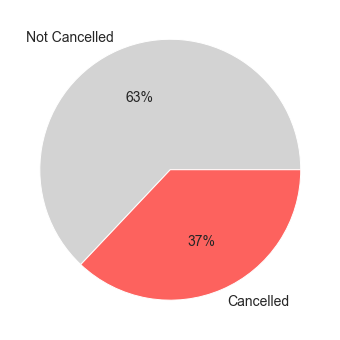

In [5]:
fig = plt.figure(figsize=(6,6))
booking['is_canceled'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors = ['lightgrey','#fd625e'],
                                           labels = ['Not Cancelled','Cancelled'], fontsize = 14)
plt.axis('off')
plt.show()

## Analyzing Numerical Variables

### Distribution of Average Daily Rates

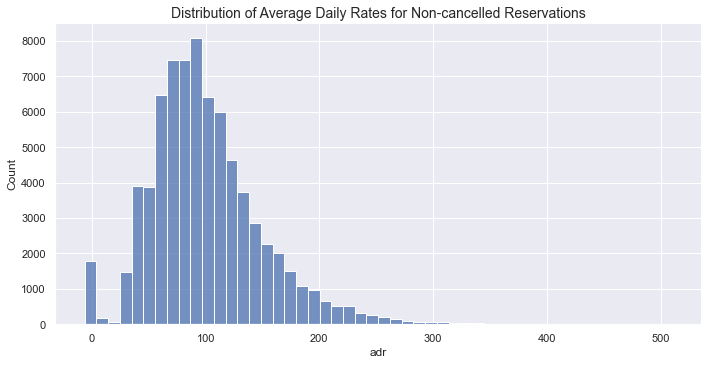

In [6]:
sns.displot(data = booking[booking['is_canceled']==0],x= 'adr', bins= 50,aspect=2)
plt.title('Distribution of Average Daily Rates for Non-cancelled Reservations', fontsize=14)
plt.show()

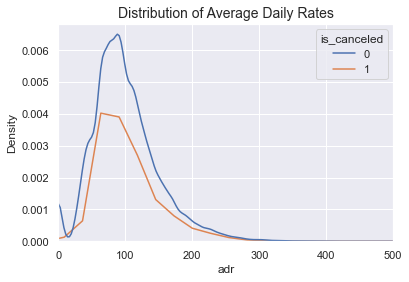

In [7]:
sns.kdeplot(data = booking, x='adr', hue='is_canceled')
plt.xlim(0,500)
plt.title('Distribution of Average Daily Rates', fontsize=14)
plt.show()

In [8]:
booking[booking['is_canceled']==0]['adr'].describe()

count    75166.000000
mean        99.987693
std         49.206263
min         -6.380000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

In [9]:
booking[booking['is_canceled']==1]['adr'].describe()

count    44224.000000
mean       104.964333
std         52.571142
min          0.000000
25%         72.415000
50%         96.200000
75%        127.620000
max       5400.000000
Name: adr, dtype: float64

Rates look to be right skewed, with average rates hovering near 100 euros for both cancelled and non-cancelled reservations. There is also a noticable amount of reservations that have an average rate of 0. Let's take a look at this.

In [10]:
print('How many reservations have an adr of 0?:',booking[booking['adr']==0].shape[0])

How many reservations have an adr of 0?: 1959


In [11]:
print('How many of these 0 adr reservations were cancelled?:', booking[(booking['adr']==0)&(booking['is_canceled']==1)].shape[0])

How many of these 0 adr reservations were cancelled?: 213


In [12]:
# Dropping reservations with 0 adr

booking = booking[booking['adr']>0]

### Distribution of Lead Time
How far in advance of arrival are guests making reservations?

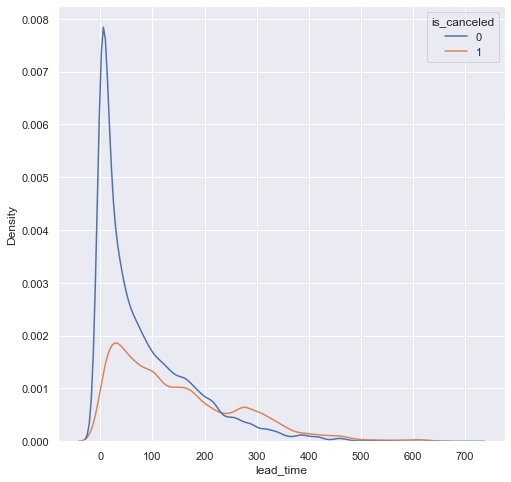

In [13]:
fig = plt.figure(figsize=(8,8))
sns.kdeplot(data = booking, x='lead_time', hue='is_canceled')
plt.show()

In [14]:
print('Lead time for non-cancelled reservations: ',round(booking[booking['is_canceled']==0]['lead_time'].mean()),'days')
print('Lead time for cancelled reservations: ',round(booking[booking['is_canceled']==1]['lead_time'].mean()),'days')

Lead time for non-cancelled reservations:  81 days
Lead time for cancelled reservations:  145 days


For reservations that aren't cancelled, there is a large frequency of bookings that took place very close to arrival date. On average, cancelled reservations are booked with over 2 months greater lead time than non-cancelled reservations. With greater lead time, guests have more time to look around at other accomodations and make changes to their plans, so it could be more likely that the reservation will be cancelled.

### Distribution of Nights Reserved
How long are the reservations?

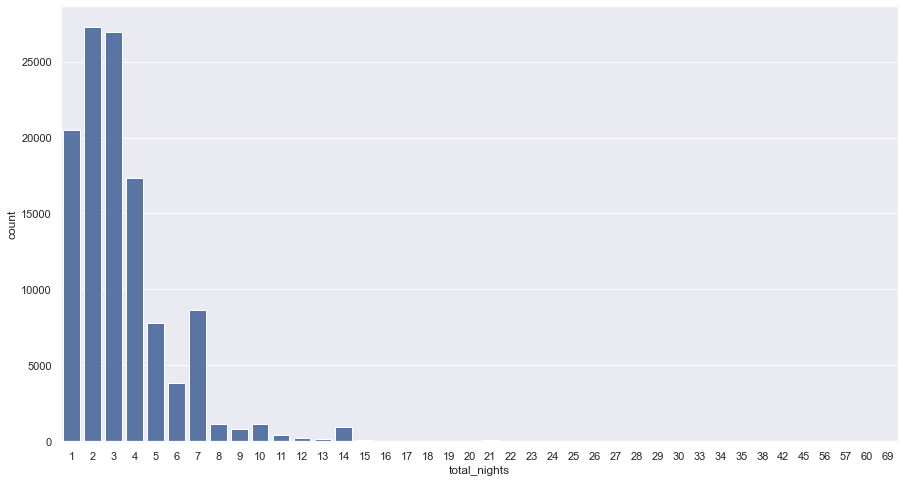

In [15]:
booking['total_nights'] = booking['stays_in_weekend_nights'] + booking['stays_in_week_nights']

fig = plt.figure(figsize=(15,8))
sns.countplot(booking['total_nights'], color='b')
plt.show()

In [16]:
print('Guests on average book for',round(booking['total_nights'].mean(),2),'days')
print('Guests most often book for',booking['total_nights'].mode()[0],'days')

Guests on average book for 3.46 days
Guests most often book for 2 days


In [17]:
booking['total_nights'].describe()

count    117430.000000
mean          3.457643
std           2.534835
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

In [18]:
booking.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis=1,inplace=True)

### Special Requests
Do cancellations decrease with an increase in the number of special requests?

In [19]:
special_requests = booking.groupby(['total_of_special_requests']).agg({'country':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'country':'bookings'})

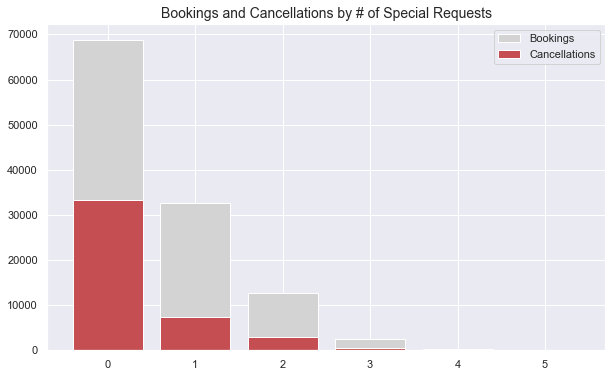

In [20]:
fig = plt.figure(figsize=(10,6))
plt.bar(special_requests['total_of_special_requests'],special_requests['bookings'], label='Bookings',color='lightgrey')
plt.bar(special_requests['total_of_special_requests'],special_requests['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.xticks(special_requests['total_of_special_requests'])
plt.title('Bookings and Cancellations by # of Special Requests', fontsize=14)
plt.show()

**Thoughts**

We can assume that guests that make one or more special request are less likely to cancel than guests that make no special requests.

### Dropping Columns

Dropping the PII (Personally identifiable information)

In [21]:
booking.drop(['name','email','phone-number','credit_card'],axis=1,inplace=True)

Dropping the Reservation Status Date and Reservation Status. These columns are only updated once the reservation is over or cancelled, so it would essentially be a future indicator of a cancellation, so we will leave it out of our predictors.

In [22]:
booking.drop(['reservation_status','reservation_status_date'],axis=1,inplace=True)

## Handling Missing Values

In [23]:
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              467
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15391
company                           111051
days_in_waiting_list                   0
customer_type   

In [24]:
booking.drop(['agent','company'],axis=1,inplace=True)

#### Children

In [25]:
booking['children'].value_counts()

0.0     108928
1.0       4807
2.0       3615
3.0         75
10.0         1
Name: children, dtype: int64

In [26]:
booking['children'].fillna(booking['children'].mode()[0],inplace=True)

#### Country

In [27]:
booking = booking.dropna(subset=['country'])

## Analyzing and Handling Categorical Variables

In [28]:
categorical_list = booking.select_dtypes('object').columns.to_list()

In [29]:
# How many unique values are there for each categorical variable?
print('\033[1m' + 'Categorical Variables')
for col in categorical_list:
    print(('\033[0m'+ col + ': ' + str(booking[col].nunique())))

Categorical Variables
hotel: 2
arrival_date_month: 12
meal: 5
country: 177
market_segment: 8
distribution_channel: 5
reserved_room_type: 9
assigned_room_type: 11
deposit_type: 3
customer_type: 4


#### Hotel
There are two hotels in the dataset: a city hotel located in Lisbon and a resort in the Algarve region of southern Portugal.

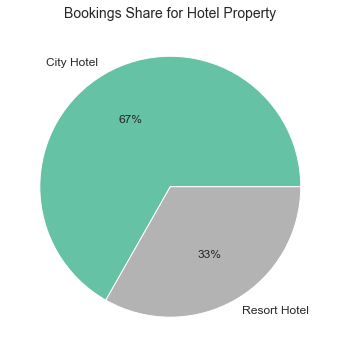

In [30]:
fig = plt.figure(figsize=(6,6))
booking['hotel'].value_counts().plot(kind='pie', autopct='%1.0f%%', cmap = 'Set2', fontsize = 12)
plt.title('Bookings Share for Hotel Property', fontsize=14)
plt.axis('off')
plt.show()

In [31]:
hotel_type = pd.DataFrame(booking.groupby(['hotel']).agg({'country':'count', 'is_canceled':'sum','adr':'mean'}).reset_index().rename(columns={'country':'bookings'}))

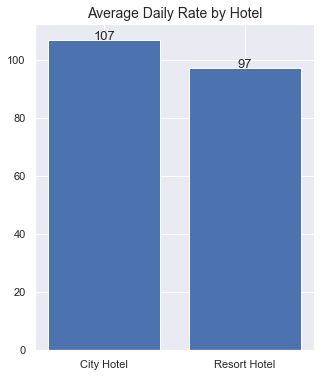

In [32]:
fig = plt.figure(figsize=(5,6))

plt.bar(hotel_type['hotel'],hotel_type['adr'])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i]), ha = 'center', fontsize = 13)
        
addlabels(list(hotel_type['hotel']), list(hotel_type['adr']))

plt.title('Average Daily Rate by Hotel', fontsize=14)
plt.show()

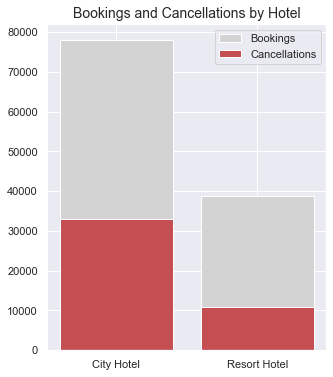

In [33]:
fig = plt.figure(figsize=(5,6))
plt.bar(hotel_type['hotel'],hotel_type['bookings'], label='Bookings',color='lightgrey')
plt.bar(hotel_type['hotel'],hotel_type['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.title('Bookings and Cancellations by Hotel', fontsize=14)
plt.show()

The city hotel is more frequently booked and more expensive, while also having far more cancellations. I would expect the hotel type to be important in predicting cancellations.

In [34]:
booking['city_hotel'] = booking['hotel'].map({'City Hotel':1,
                                             'Resort Hotel': 0})

booking.drop(['hotel'],axis=1,inplace=True)

#### Arrival Date

In [35]:
booking['month_abbr'] = booking['arrival_date_month'].str[0:3]

In [36]:
canceled_day = booking.groupby(['month_abbr','arrival_date_day_of_month'])['is_canceled'].sum().reset_index()
pt = canceled_day.pivot(index = 'month_abbr', columns = 'arrival_date_day_of_month', values = 'is_canceled')

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

pt = pt.reindex(months)

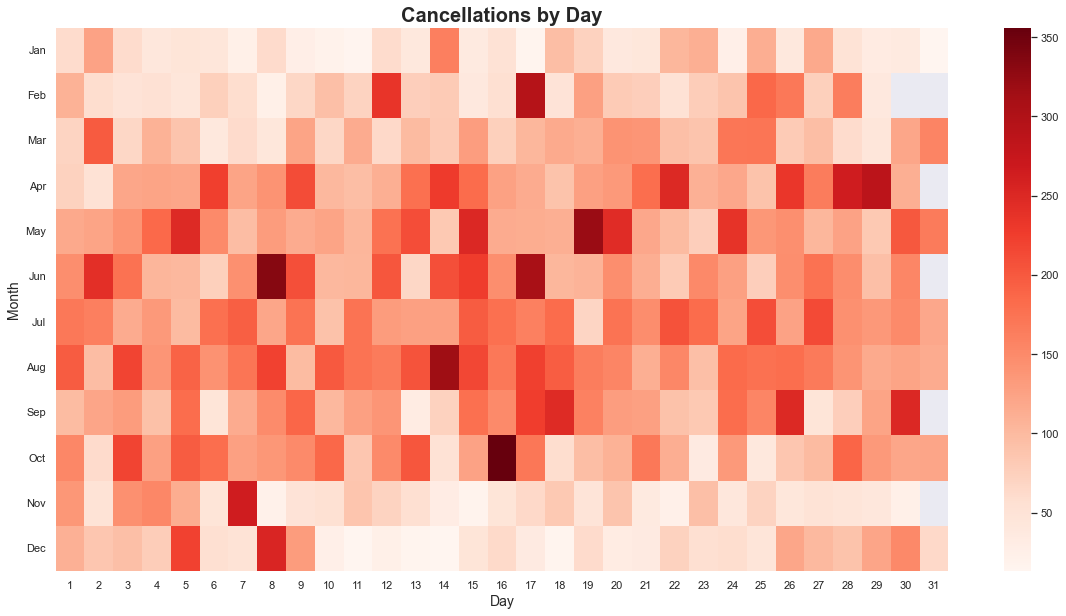

In [37]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(pt, cmap='Reds')
plt.yticks(rotation = 0)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.title('Cancellations by Day', fontsize = 20, fontweight ='bold')
plt.show()

**Thoughts**

June 10 appears to be Portugal Day, which explains the high # of cancellations. February is often when the Carnaval festival is celebrated, so that may be the reason for the cancellations on February 17. October 16 doesn't seem to be a holiday, so no obvious explanation for the cancellations.

In [38]:
booking.drop('month_abbr',axis=1,inplace=True)

In [39]:
import calendar

d = dict((v,k) for k,v in enumerate(calendar.month_name))

In [40]:
# Converting the month column from string to integer
booking['arrival_date_month'] = booking['arrival_date_month'].map(d).astype(int)

In [41]:
booking_month = booking.groupby(['arrival_date_month']).agg({'country':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'country':'bookings'})

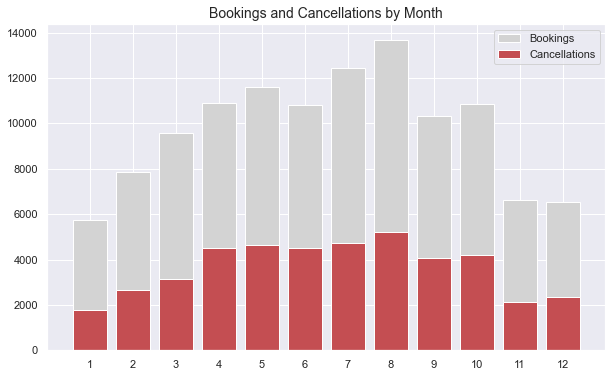

In [42]:
fig = plt.figure(figsize=(10,6))
plt.bar(booking_month['arrival_date_month'],booking_month['bookings'], label='Bookings',color='lightgrey')
plt.bar(booking_month['arrival_date_month'],booking_month['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.xticks(booking_month['arrival_date_month'])
plt.title('Bookings and Cancellations by Month', fontsize=14)
plt.show()

As expected, there is some seasonality in bookings, with the late summer months having the most bookings and cancellations, while the winter months have the least bookings.

#### Reserved and Assigned Room Type

What % of the time are guests assigned to a room different than the one reserved?

In [43]:
print(round((booking['assigned_room_type'] != booking['reserved_room_type']).sum()/booking.shape[0]*100),
      'percent of guests were assigned to a room different than the one reserved')

12 percent of guests were assigned to a room different than the one reserved


In [44]:
booking['reserved_room_type'].value_counts().sort_values()

L        6
H      595
C      913
B     1085
G     1995
F     2817
E     6385
D    18977
A    84190
Name: reserved_room_type, dtype: int64

In [45]:
rooms = booking.groupby(['reserved_room_type']).agg({'country':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'country':'bookings'})

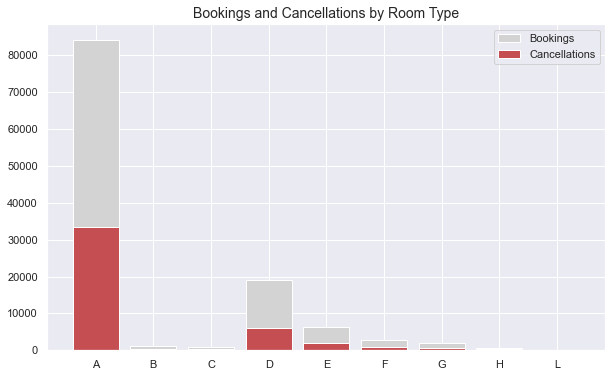

In [46]:
fig = plt.figure(figsize=(10,6))
plt.bar(rooms['reserved_room_type'],rooms['bookings'], label='Bookings',color='lightgrey')
plt.bar(rooms['reserved_room_type'],rooms['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.xticks(rooms['reserved_room_type'])
plt.title('Bookings and Cancellations by Room Type', fontsize=14)
plt.show()

Using frequency encoding to transform the values

In [47]:
freq = booking.groupby('reserved_room_type').size()/len(booking)
booking.loc[:, 'room_freq'] = booking['reserved_room_type'].map(freq)
booking.drop(['reserved_room_type', 'assigned_room_type'], axis=1,inplace=True)

#### Meal

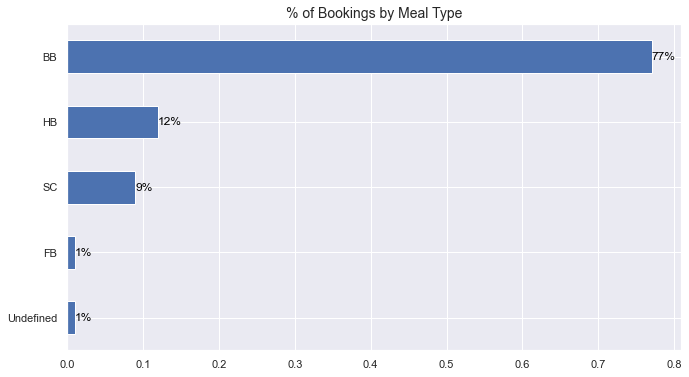

In [48]:
fig = plt.figure(figsize=(11,6))
booking['meal'].value_counts(normalize=True).round(2).sort_values().plot(kind='barh')
for i, v in enumerate(booking['meal'].value_counts(normalize=True).round(2).sort_values()):
    plt.text(v, i-.05, str(round(v*100))+str('%'), color = 'black')
plt.title('% of Bookings by Meal Type', fontsize=14)
plt.show()

What do the meal values mean?

- Undefined/SC = No meal package
- BB = Bed and breakfast
- HB = Half board (breakfast and one other meal - usually dinner)
- FB = Full board (breakfast, lunch and dinner)

Most guests opt for the Bed and breakfast. I will use label encoding to convert these values to integers

In [49]:
booking['meal'] = booking['meal'].map({'Undefined': 0,
                                      'SC': 0,
                                      'BB': 1,
                                      'HB': 2,
                                      'FB': 3})

#### Deposit Type

In [50]:
deposit = booking.groupby(['deposit_type']).agg({'country':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'country':'bookings'})

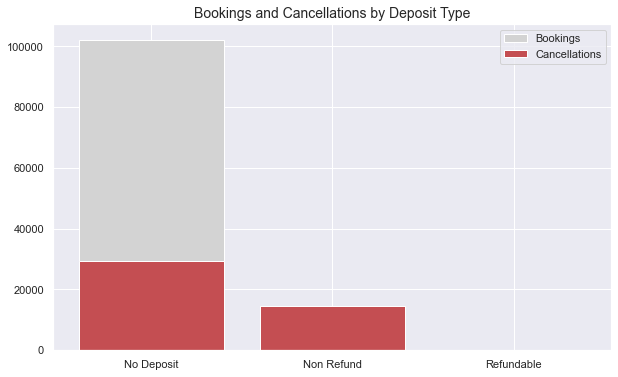

In [51]:
fig = plt.figure(figsize=(10,6))
plt.bar(deposit['deposit_type'],deposit['bookings'], label='Bookings',color='lightgrey')
plt.bar(deposit['deposit_type'],deposit['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.title('Bookings and Cancellations by Deposit Type', fontsize=14)
plt.show()

I will use one label encoding to transform the deposit type variable

In [52]:
booking['deposit_type'] = booking['deposit_type'].map({'Refundable': 0, 'Non Refund': 1, 'No Deposit': 2})

#### Customer Type

In [53]:
booking['customer_type'].value_counts()

Transient          87742
Transient-Party    24630
Contract            4052
Group                539
Name: customer_type, dtype: int64

In [54]:
customer_type = booking.groupby(['customer_type']).agg({'country':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'country':'bookings'})

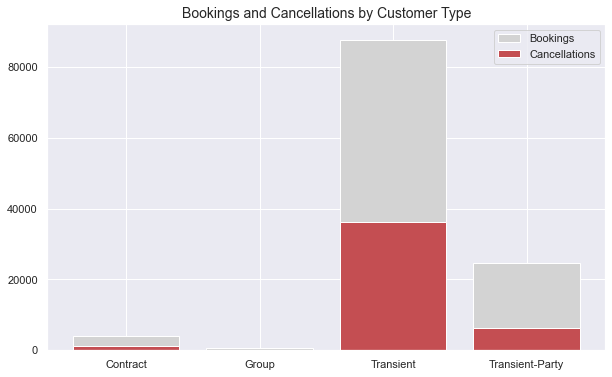

In [55]:
fig = plt.figure(figsize=(10,6))
plt.bar(customer_type['customer_type'],customer_type['bookings'], label='Bookings',color='lightgrey')
plt.bar(customer_type['customer_type'],customer_type['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.title('Bookings and Cancellations by Customer Type', fontsize=14)
plt.show()

I will transform this field to indicate whether the customer type of booking is transient (Transient or Transient-Party) or not. 

In [56]:
booking['transient_booking'] = booking['customer_type'].map(
    lambda x: 1 if 'Transient' in x else 0)

In [57]:
booking.drop('customer_type',axis=1,inplace=True)

#### Country
Due to the high number of country labels, I will instead create a new column to indicate whether the guest is from Portugal or not.

In [58]:
booking['from_Portugal'] = booking['country'].apply(lambda x: 1 if x == 'PRT' else 0)

In [59]:
booking['from_Portugal'].value_counts()

0    69923
1    47040
Name: from_Portugal, dtype: int64

In [60]:
booking.drop('country',axis=1,inplace=True)

#### Distribution Channel

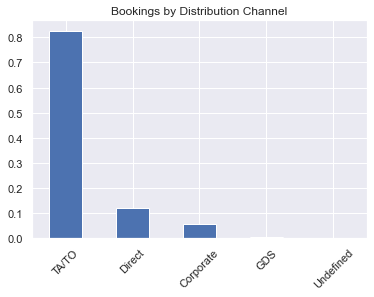

In [61]:
booking['distribution_channel'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Bookings by Distribution Channel')
plt.show()

In [62]:
channel = booking.groupby(['distribution_channel']).agg({'market_segment':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'market_segment':'bookings'})

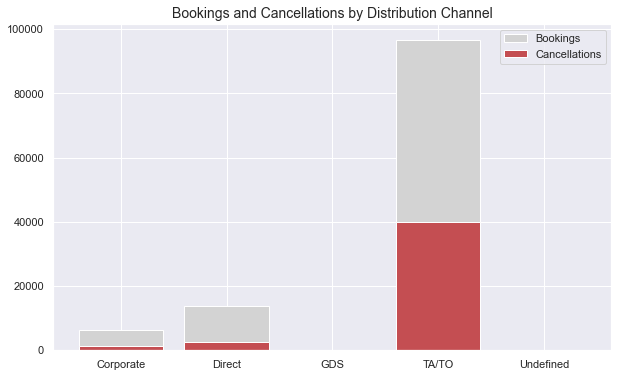

In [63]:
fig = plt.figure(figsize=(10,6))
plt.bar(channel['distribution_channel'],channel['bookings'], label='Bookings',color='lightgrey')
plt.bar(channel['distribution_channel'],channel['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.title('Bookings and Cancellations by Distribution Channel', fontsize=14)
plt.show()

Using frequency encoding to transform the values

In [64]:
freq = booking.groupby('distribution_channel').size()/len(booking)
booking.loc[:, 'channel_freq'] = booking['distribution_channel'].map(freq)
booking.drop('distribution_channel', axis=1,inplace=True)

#### Market Segment

In [65]:
booking['market_segment'].value_counts()

Online TA        56037
Offline TA/TO    23830
Groups           19554
Direct           12211
Corporate         5035
Aviation           231
Complementary       63
Undefined            2
Name: market_segment, dtype: int64

In [66]:
segment = booking.groupby(['market_segment']).agg({'adults':'count', 'is_canceled':'sum'}).reset_index().rename(columns={'adults':'bookings'})

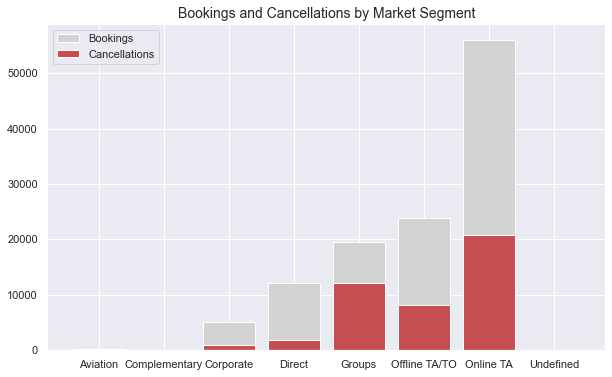

In [67]:
fig = plt.figure(figsize=(10,6))
plt.bar(segment['market_segment'],segment['bookings'], label='Bookings',color='lightgrey')
plt.bar(segment['market_segment'],segment['is_canceled'], label='Cancellations', color ='r')
plt.legend()
plt.title('Bookings and Cancellations by Market Segment', fontsize=14)
plt.show()

In [68]:
freq = booking.groupby('market_segment').size()/len(booking)
booking.loc[:, 'segment_freq'] = booking['market_segment'].map(freq)
booking.drop('market_segment',axis=1,inplace=True)

In [69]:
booking.to_csv(r'Documents\Clean Hotel Booking.csv',index=False)